# Calories Burned Prediction - Feature Engineering

## 1. Setup and Data Loading

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings

# import custom modules
sys.path.append('..')
from src.features.build_features import *

# display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
warnings.filterwarnings('ignore')

# visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [2]:
# load datasets
print("Loading datasets...")
train_df = pd.read_csv('../data/raw/train.csv')
test_df = pd.read_csv('../data/raw/test.csv')
original_df = pd.read_csv('../data/raw/calories.csv')

print(f"Training dataset shape: {train_df.shape}")
print(f"Test dataset shape: {test_df.shape}")
print(f"Original dataset shape: {original_df.shape}")

Loading datasets...
Training dataset shape: (750000, 9)
Test dataset shape: (250000, 8)
Original dataset shape: (15000, 9)


## 2. Data Preparation

In [3]:
# align datasets (rename columns)
train_aligned, original_aligned = align_datasets(train_df, original_df)

# display sample from each aligned dataset
print("Aligned training dataset sample:")
display(train_aligned.head())
print("\nAligned original dataset sample:")
display(original_aligned.head())

2025-05-08 14:13:37,054 - src.features.build_features - INFO - Aligning datasets
2025-05-08 14:13:37,091 - src.features.build_features - INFO - Common columns: ['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']


Aligned training dataset sample:


,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.00,82.00,26.00,101.00,41.00,150.00
1,1,female,64,163.00,60.00,8.00,85.00,39.70,34.00
2,2,female,51,161.00,64.00,7.00,84.00,39.80,29.00
3,3,male,20,192.00,90.00,25.00,105.00,40.70,140.00
4,4,female,38,166.00,61.00,25.00,102.00,40.60,146.00



Aligned original dataset sample:


,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.00,94.00,29.00,105.00,40.80,231.00
1,14861698,female,20,166.00,60.00,14.00,94.00,40.30,66.00
2,11179863,male,69,179.00,79.00,5.00,88.00,38.70,26.00
3,16180408,female,34,179.00,71.00,13.00,100.00,40.50,71.00
4,17771927,female,27,154.00,58.00,10.00,81.00,39.80,35.00


In [4]:
# combine datasets
combined_df = combine_datasets(train_df, original_df)
print(f"Combined dataset shape: {combined_df.shape}")
display(combined_df.head())

# check for duplicates
n_duplicates = combined_df.duplicated().sum()
print(f"Number of duplicated rows: {n_duplicates}")

2025-05-08 14:13:37,116 - src.features.build_features - INFO - Combining datasets
2025-05-08 14:13:37,117 - src.features.build_features - INFO - Aligning datasets
2025-05-08 14:13:37,151 - src.features.build_features - INFO - Common columns: ['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']
2025-05-08 14:13:37,184 - src.features.build_features - INFO - Combined dataset shape: (765000, 9)


Combined dataset shape: (765000, 9)


,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.00,82.00,26.00,101.00,41.00,150.00
1,1,female,64,163.00,60.00,8.00,85.00,39.70,34.00
2,2,female,51,161.00,64.00,7.00,84.00,39.80,29.00
3,3,male,20,192.00,90.00,25.00,105.00,40.70,140.00
4,4,female,38,166.00,61.00,25.00,102.00,40.60,146.00


Number of duplicated rows: 0


## 3. Feature Creation

In [5]:
# create basic features
train_basic = create_basic_features(combined_df)
test_basic = create_basic_features(test_df)

# display new features
new_features = list(set(train_basic.columns) - set(combined_df.columns))
print(f"New features created: {new_features}")

# look at the new features
display(train_basic[new_features].head())

# basic statistics of new features
display(train_basic[new_features].describe().T)

2025-05-08 14:13:37,438 - src.features.build_features - INFO - Creating basic features
2025-05-08 14:13:37,580 - src.features.build_features - INFO - Created features: ['BMI', 'Sex_Numeric', 'Weight_Duration', 'Heart_Rate_Reserve', 'Temp_Heart_Rate', 'Age_Category', 'Temp_Duration', 'Rest_Heart_Rate', 'Workout_Volume']
2025-05-08 14:13:37,581 - src.features.build_features - INFO - Creating basic features
2025-05-08 14:13:37,619 - src.features.build_features - INFO - Created features: ['BMI', 'Sex_Numeric', 'Weight_Duration', 'Heart_Rate_Reserve', 'Temp_Heart_Rate', 'Age_Category', 'Temp_Duration', 'Rest_Heart_Rate', 'Workout_Volume']


New features created: ['BMI', 'Sex_Numeric', 'Weight_Duration', 'Heart_Rate_Reserve', 'Temp_Heart_Rate', 'Age_Category', 'Temp_Duration', 'Rest_Heart_Rate', 'Workout_Volume']


,BMI,Sex_Numeric,Weight_Duration,Heart_Rate_Reserve,Temp_Heart_Rate,Age_Category,Temp_Duration,Rest_Heart_Rate,Workout_Volume
0,22.96,1,2132.00,0.55,4141.00,Middle_Age,1066.00,184,2626.00
1,22.58,0,480.00,0.54,3374.50,Elderly,317.60,156,680.00
2,24.69,0,448.00,0.50,3343.20,Senior,278.60,169,588.00
3,24.41,1,2250.00,0.53,4273.50,Young,1017.50,200,2625.00
4,22.14,0,1525.00,0.56,4141.20,Middle_Age,1015.00,182,2550.00


,count,mean,std,min,25%,50%,75%,max
BMI,765000.00,24.37,1.51,12.38,23.26,24.39,25.49,46.44
Sex_Numeric,765000.00,0.50,0.50,0.00,0.00,0.00,1.00,1.00
Weight_Duration,765000.00,1156.54,672.93,45.00,600.00,1105.00,1633.00,3780.00
Heart_Rate_Reserve,765000.00,0.54,0.07,0.34,0.49,0.53,0.58,0.91
Temp_Heart_Rate,765000.00,3828.69,438.04,2485.70,3497.40,3838.00,4171.50,5286.40
Temp_Duration,765000.00,623.37,343.62,37.10,317.60,606.00,931.50,1245.00
Rest_Heart_Rate,765000.00,178.55,15.21,141.00,168.00,180.00,192.00,200.00
Workout_Volume,765000.00,1541.76,932.36,67.00,728.00,1455.00,2323.00,3840.00


### Visualize New Features

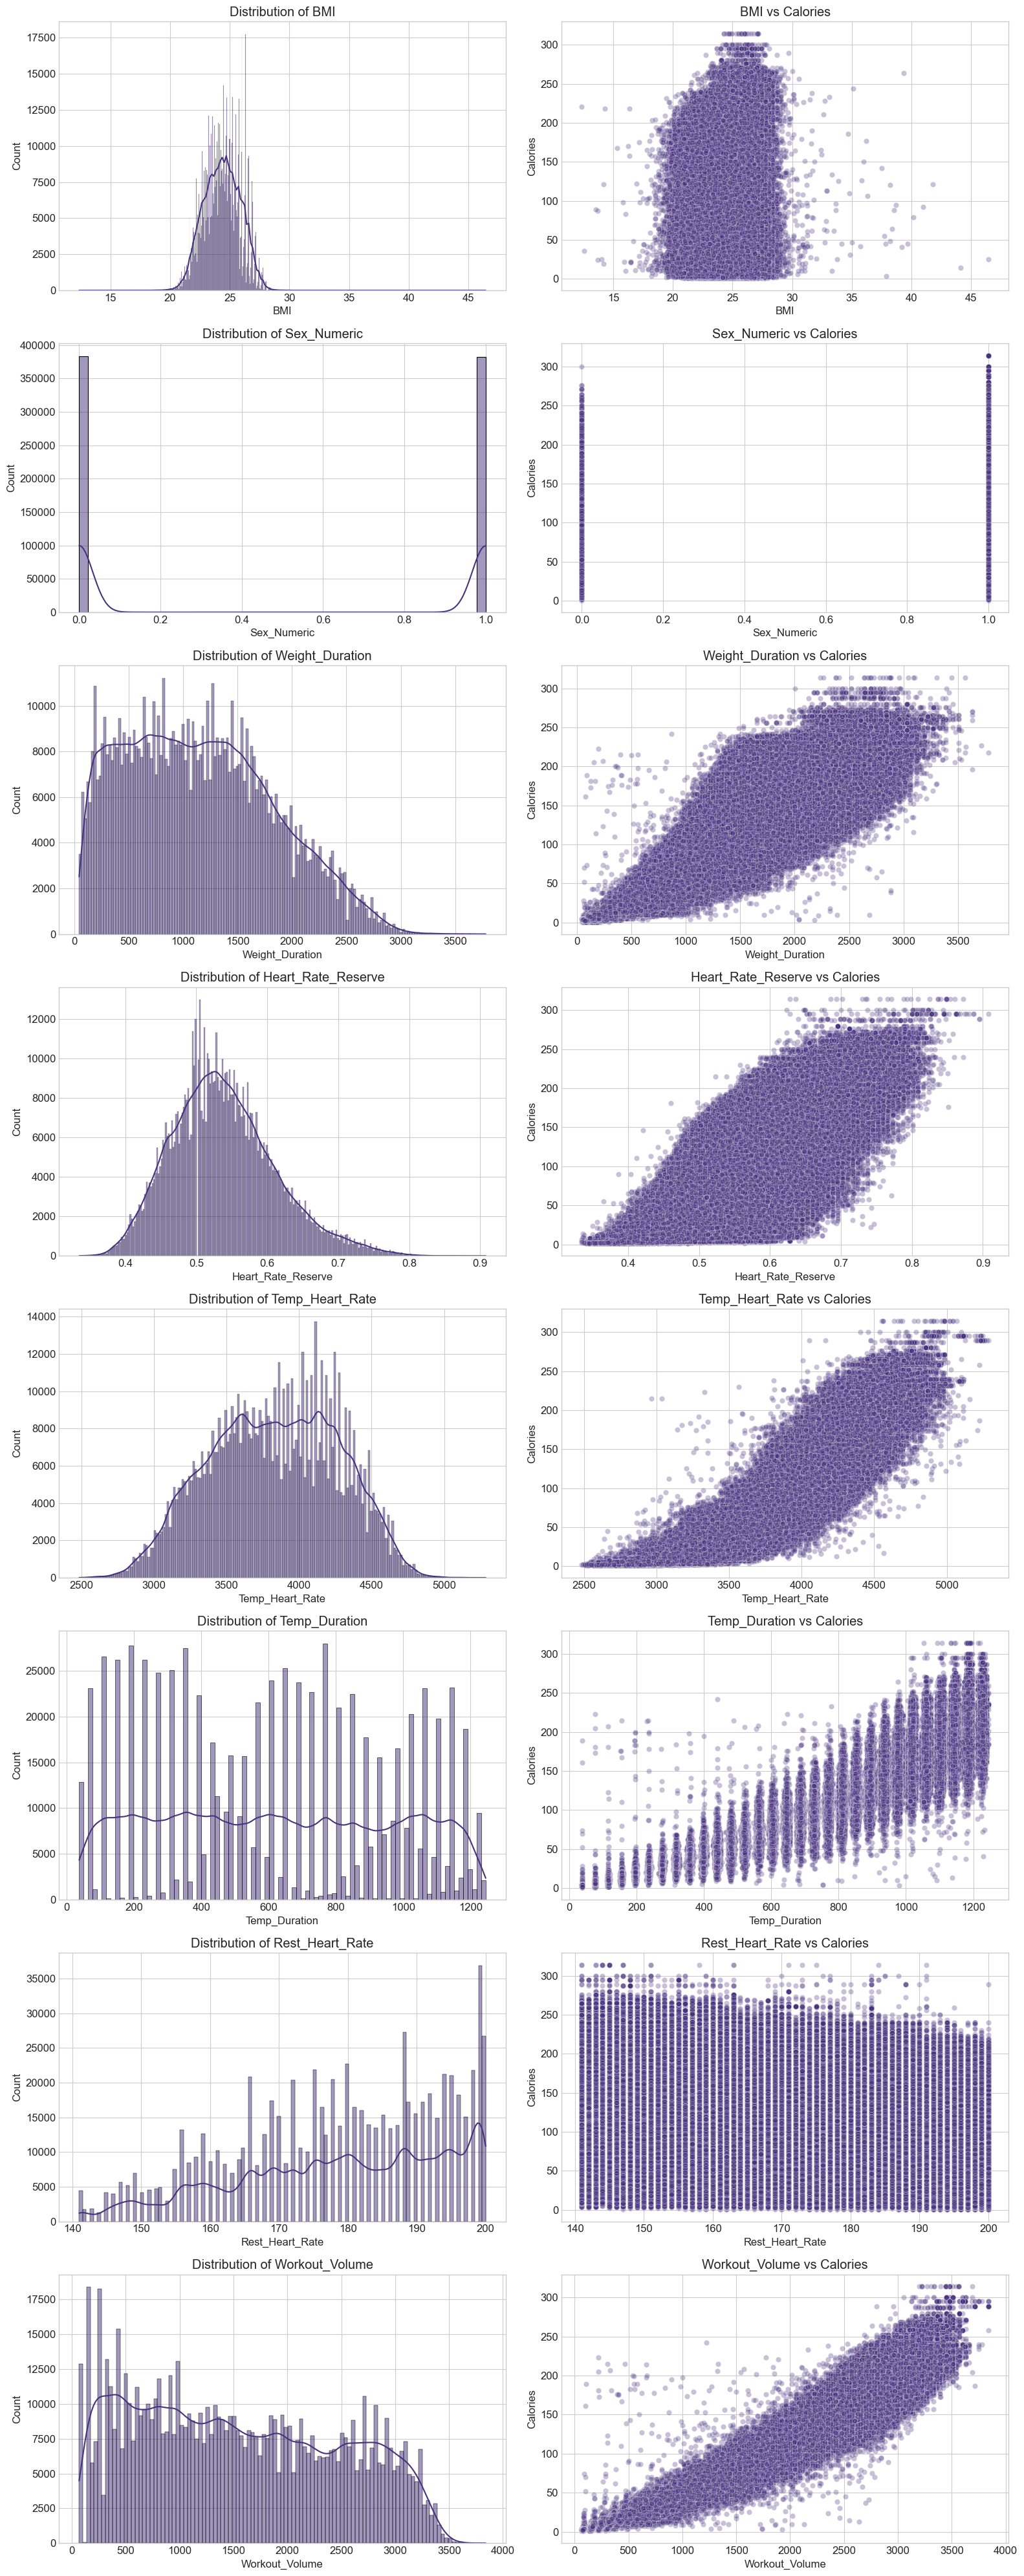

In [6]:
# visualize distributions of new continuous features
continuous_new_features = [feat for feat in new_features if train_basic[feat].dtype != 'object' and
                           train_basic[feat].dtype != 'category']

# distribution plots
fig, axes = plt.subplots(len(continuous_new_features), 2, figsize=(16, 5*len(continuous_new_features)))

for i, feature in enumerate(continuous_new_features):
    # histogram
    sns.histplot(train_basic[feature], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {feature}')

    # scatter plot against target
    sns.scatterplot(x=feature, y='Calories', data=train_basic, alpha=0.3, ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} vs Calories')

plt.tight_layout()
plt.show()

In [7]:
# check correlation of new features with target
if 'Calories' in train_basic.columns:
    corr_with_target = train_basic[continuous_new_features + ['Calories']].corr()['Calories'].sort_values(ascending=False)
    print("Correlation with target (Calories):")
    display(corr_with_target)

Correlation with target (Calories):


Calories              1.00
Workout_Volume        0.98
Temp_Duration         0.96
Temp_Heart_Rate       0.92
Weight_Duration       0.91
Heart_Rate_Reserve    0.77
BMI                   0.05
Sex_Numeric           0.01
Rest_Heart_Rate      -0.15
Name: Calories, dtype: float64

### Create Polynomial Features

In [8]:
# create polynomial features for key predictors
key_predictors = ['Duration', 'Heart_Rate', 'Body_Temp']
train_poly = create_polynomial_features(train_basic, degree=2, features=key_predictors)
test_poly = create_polynomial_features(test_basic, degree=2, features=key_predictors)

# display new polynomial features
poly_features = list(set(train_poly.columns) - set(train_basic.columns))
print(f"Polynomial features created: {poly_features}")
display(train_poly[poly_features].head())

2025-05-08 14:14:09,935 - src.features.build_features - INFO - Creating polynomial features with degree=2
2025-05-08 14:14:10,274 - src.features.build_features - INFO - Created 6 polynomial features
2025-05-08 14:14:10,281 - src.features.build_features - INFO - Creating polynomial features with degree=2
2025-05-08 14:14:10,406 - src.features.build_features - INFO - Created 6 polynomial features


Polynomial features created: ['Heart_Rate Body_Temp', 'Body_Temp^2', 'Duration^2', 'Duration Body_Temp', 'Heart_Rate^2', 'Duration Heart_Rate']


,Heart_Rate Body_Temp,Body_Temp^2,Duration^2,Duration Body_Temp,Heart_Rate^2,Duration Heart_Rate
0,4141.00,1681.00,676.00,1066.00,10201.00,2626.00
1,3374.50,1576.09,64.00,317.60,7225.00,680.00
2,3343.20,1584.04,49.00,278.60,7056.00,588.00
3,4273.50,1656.49,625.00,1017.50,11025.00,2625.00
4,4141.20,1648.36,625.00,1015.00,10404.00,2550.00


## 4. Feature Transformation

In [9]:
# apply transformations
train_transformed = transform_features(train_poly)
test_transformed = transform_features(test_poly)

# display transformed features
transformed_features = list(set(train_transformed.columns) - set(train_poly.columns))
print(f"Transformed features created: {transformed_features}")
display(train_transformed[transformed_features].head())

2025-05-08 14:14:10,446 - src.features.build_features - INFO - Applying feature transformations
2025-05-08 14:14:10,670 - src.features.build_features - INFO - Applied transformations, new features: ['Log_Workout_Volume', 'Log_Calories']
2025-05-08 14:14:10,671 - src.features.build_features - INFO - Applying feature transformations
2025-05-08 14:14:10,724 - src.features.build_features - INFO - Applied transformations, new features: ['Log_Workout_Volume']


Transformed features created: ['Log_Workout_Volume', 'Log_Calories']


,Log_Workout_Volume,Log_Calories
0,7.87,5.02
1,6.52,3.56
2,6.38,3.40
3,7.87,4.95
4,7.84,4.99


### Visualize Transformed Features

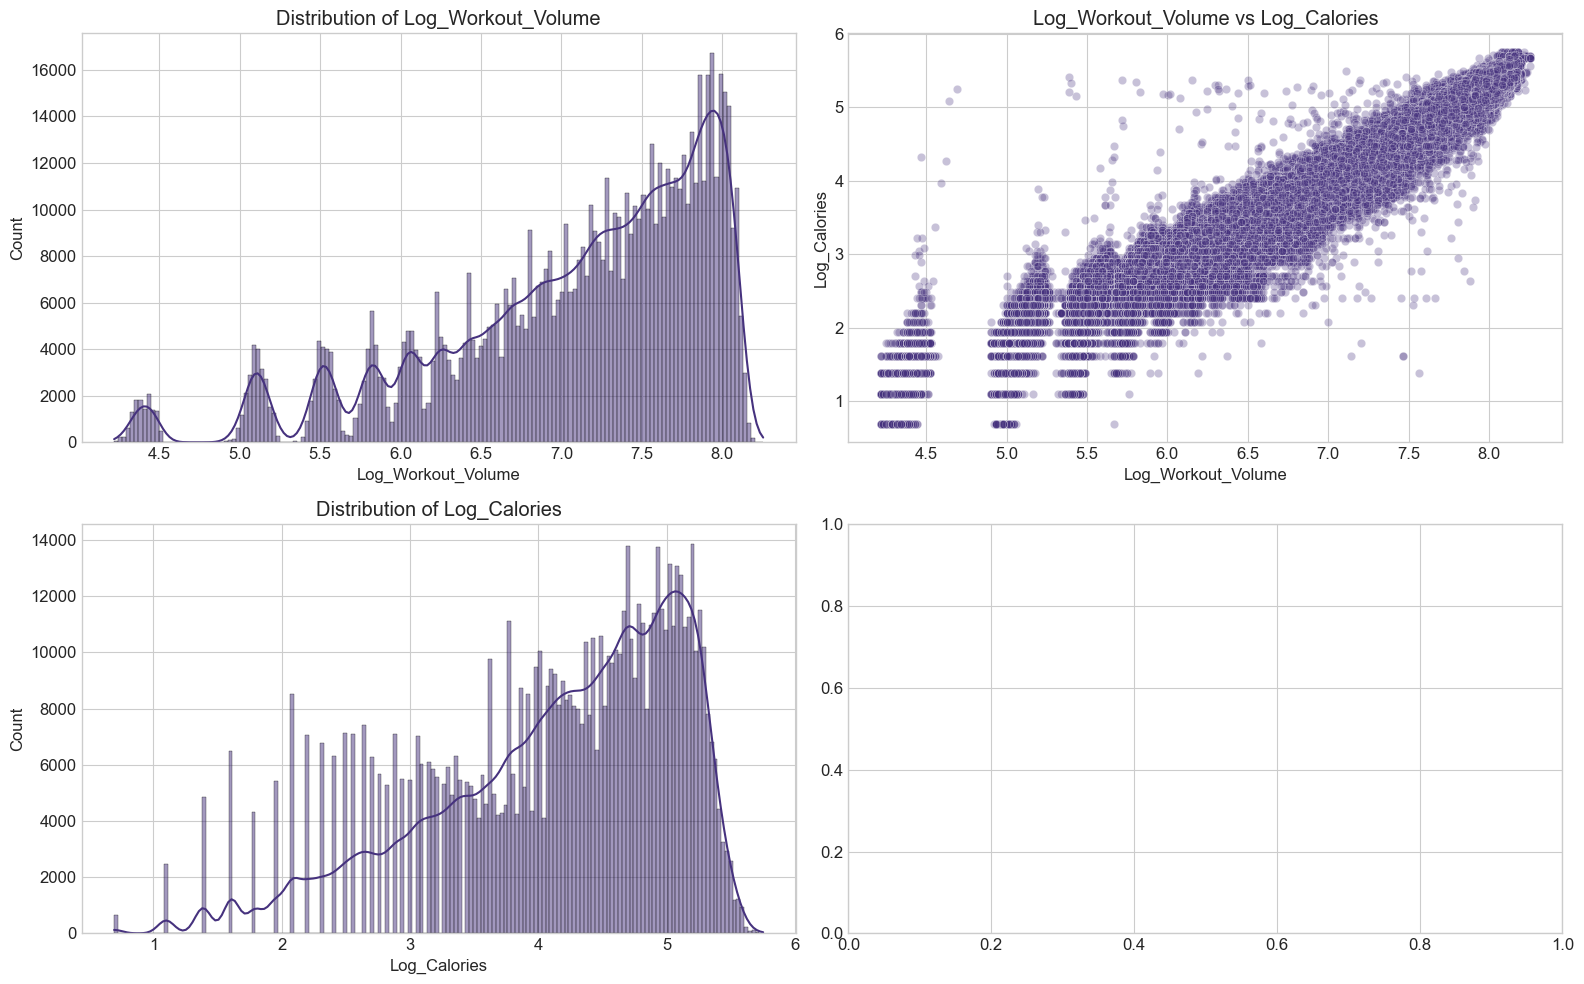

In [10]:
# visualize transformed features
if transformed_features:
    fig, axes = plt.subplots(len(transformed_features), 2, figsize=(16, 5*len(transformed_features)))

    # if there's only one transformed feature, wrap axes in a list
    if len(transformed_features) == 1:
        axes = [axes]

    for i, feature in enumerate(transformed_features):
        # histogram of transformed feature
        sns.histplot(train_transformed[feature].dropna(), kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Distribution of {feature}')

        # if Log_Calories is present, use it as target for comparison
        if 'Log_Calories' in train_transformed.columns and feature != 'Log_Calories':
            sns.scatterplot(x=feature, y='Log_Calories', data=train_transformed, alpha=0.3, ax=axes[i, 1])
            axes[i, 1].set_title(f'{feature} vs Log_Calories')
        elif 'Calories' in train_transformed.columns and feature != 'Log_Calories':
            sns.scatterplot(x=feature, y='Calories', data=train_transformed, alpha=0.3, ax=axes[i, 1])
            axes[i, 1].set_title(f'{feature} vs Calories')

    plt.tight_layout()
    plt.show()

## 5. Feature Selection and Multicollinearity

In [11]:
# check for multicollinearity
multicollinear_pairs = check_multicollinearity(train_transformed, threshold=0.85)
display(multicollinear_pairs.head(20))

2025-05-08 14:14:17,403 - src.features.build_features - INFO - Checking multicollinearity with threshold=0.85
2025-05-08 14:14:18,584 - src.features.build_features - INFO - Found 104 highly correlated feature pairs


,Feature1,Feature2,Correlation
0,Age,Rest_Heart_Rate,1.00
61,Temp_Duration,Duration Body_Temp,1.00
50,Workout_Volume,Duration Heart_Rate,1.00
71,Temp_Heart_Rate,Heart_Rate Body_Temp,1.00
11,Duration,Duration Body_Temp,1.00
6,Duration,Temp_Duration,1.00
32,Body_Temp,Body_Temp^2,1.00
24,Heart_Rate,Heart_Rate^2,1.00
20,Heart_Rate,Temp_Heart_Rate,1.00
25,Heart_Rate,Heart_Rate Body_Temp,1.00


In [12]:
# remove highly multicollinear features
train_reduced = remove_multicollinear_features(train_transformed, target='Calories', threshold=0.85)
test_reduced = remove_multicollinear_features(test_transformed, threshold=0.85)

print(f"Features after removing multicollinearity: {train_reduced.shape[1]} (was {train_transformed.shape[1]})")
removed_features = list(set(train_transformed.columns) - set(train_reduced.columns))
print(f"Removed features: {removed_features}")

2025-05-08 14:14:18,594 - src.features.build_features - INFO - Removing multicollinear features with threshold=0.85
2025-05-08 14:14:19,782 - src.features.build_features - INFO - Dropping 16 multicollinear features: ['Weight', 'Heart_Rate', 'Body_Temp', 'Rest_Heart_Rate', 'Workout_Volume', 'Temp_Duration', 'Temp_Heart_Rate', 'Weight_Duration', 'Duration^2', 'Duration Heart_Rate', 'Duration Body_Temp', 'Heart_Rate^2', 'Heart_Rate Body_Temp', 'Body_Temp^2', 'Log_Calories', 'Log_Workout_Volume']
2025-05-08 14:14:19,823 - src.features.build_features - INFO - Removing multicollinear features with threshold=0.85
2025-05-08 14:14:20,175 - src.features.build_features - INFO - Dropping 15 multicollinear features: ['Weight', 'Heart_Rate', 'Body_Temp', 'Rest_Heart_Rate', 'Workout_Volume', 'Temp_Duration', 'Temp_Heart_Rate', 'Weight_Duration', 'Duration^2', 'Duration Heart_Rate', 'Duration Body_Temp', 'Heart_Rate^2', 'Heart_Rate Body_Temp', 'Body_Temp^2', 'Log_Workout_Volume']


Features after removing multicollinearity: 10 (was 26)
Removed features: ['Log_Workout_Volume', 'Weight', 'Heart_Rate', 'Heart_Rate Body_Temp', 'Body_Temp^2', 'Log_Calories', 'Duration^2', 'Weight_Duration', 'Workout_Volume', 'Temp_Heart_Rate', 'Duration Body_Temp', 'Heart_Rate^2', 'Temp_Duration', 'Rest_Heart_Rate', 'Body_Temp', 'Duration Heart_Rate']


In [13]:
# feature selection
X_selected, selected_features = select_features(train_reduced, target='Calories', method='importance', k=15)
print("Selected features:")
print(selected_features)

2025-05-08 14:14:20,194 - src.features.build_features - INFO - Selecting features using importance method
2025-05-08 14:20:52,044 - src.features.build_features - INFO - Selected 7 features: ['Duration', 'Heart_Rate_Reserve', 'Sex_Numeric', 'Age', 'Height', 'BMI', 'id']


Selected features:
['Duration', 'Heart_Rate_Reserve', 'Sex_Numeric', 'Age', 'Height', 'BMI', 'id']


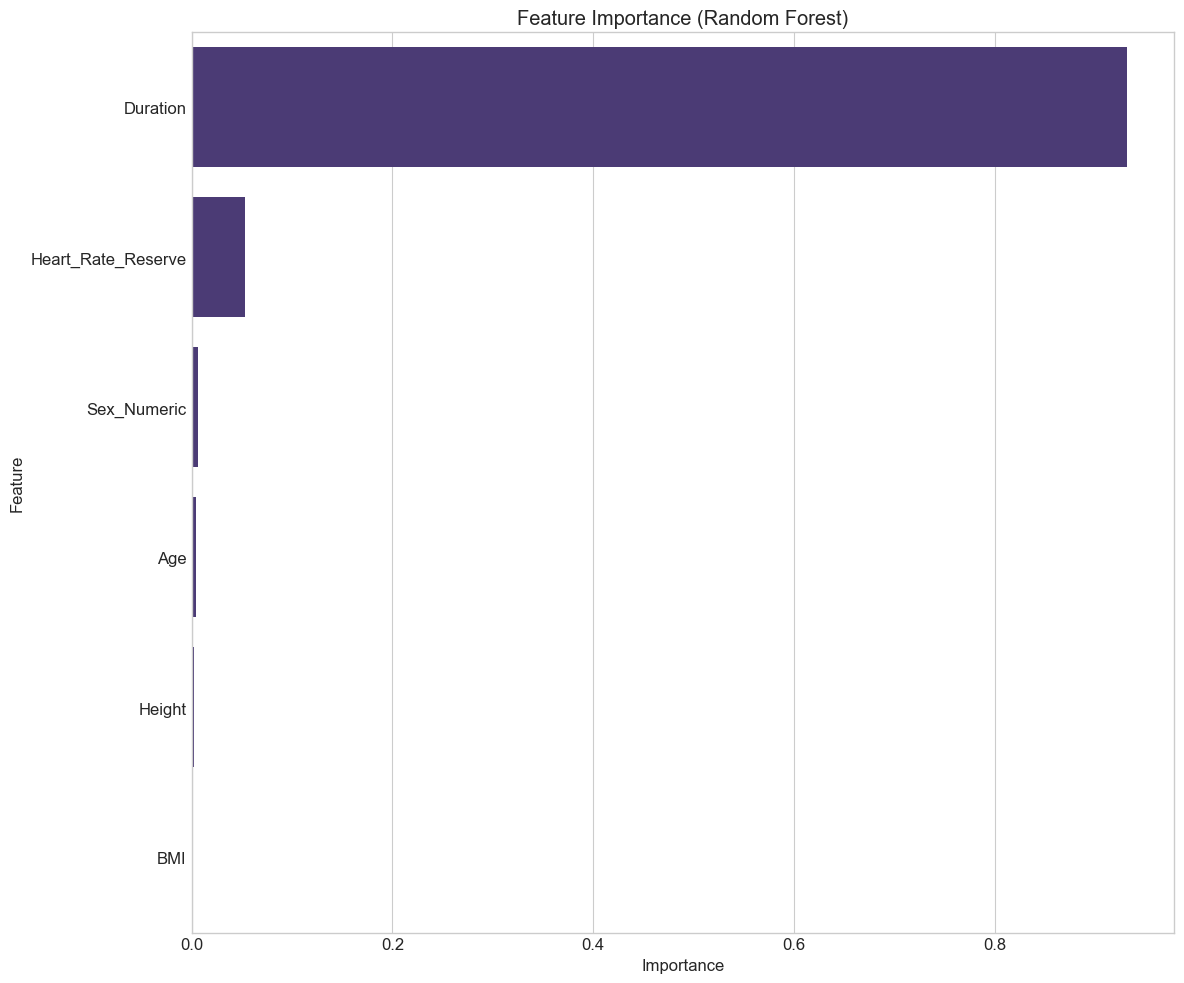

In [14]:
# visualize feature importance
from sklearn.ensemble import RandomForestRegressor

# get numeric features
numeric_features = train_reduced.select_dtypes(include=['number']).columns.tolist()
if 'id' in numeric_features:
    numeric_features.remove('id')
if 'Calories' in numeric_features:
    numeric_features.remove('Calories')

# train a model to get feature importance
model = RandomForestRegressor(n_estimators=100, random_state=7)
model.fit(train_reduced[numeric_features], train_reduced['Calories'])

# get feature importances
importances = pd.DataFrame({
    'Feature': numeric_features,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

# plot feature importance
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=importances.head(20))
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

## 6. Create Feature Sets

In [15]:
# create feature sets
feature_sets = create_feature_sets(train_reduced, target='Calories')

# display feature sets
for name, features in feature_sets.items():
    print(f"\n{name.upper()} FEATURES ({len(features)}):\n{features}")

2025-05-08 14:27:20,688 - src.features.build_features - INFO - Creating feature sets
2025-05-08 14:27:20,716 - src.features.build_features - INFO - Selecting features using importance method
2025-05-08 14:34:13,224 - src.features.build_features - INFO - Selected 7 features: ['Duration', 'Heart_Rate_Reserve', 'Sex_Numeric', 'Age', 'Height', 'BMI', 'id']
2025-05-08 14:34:14,178 - src.features.build_features - INFO - Created 6 feature sets



ORIGINAL FEATURES (7):
['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Sex_Numeric']

BASE FEATURES (8):
['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Sex_Numeric', 'BMI']

INTERMEDIATE FEATURES (12):
['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Sex_Numeric', 'BMI', 'Heart_Rate_Reserve', 'Workout_Volume', 'Temp_Duration', 'Temp_Heart_Rate']

ADVANCED FEATURES (12):
['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Sex_Numeric', 'BMI', 'Heart_Rate_Reserve', 'Workout_Volume', 'Temp_Duration', 'Temp_Heart_Rate']

ALL FEATURES (8):
['Sex', 'Age', 'Height', 'Duration', 'BMI', 'Heart_Rate_Reserve', 'Age_Category', 'Sex_Numeric']

SELECTED FEATURES (7):
['Duration', 'Heart_Rate_Reserve', 'Sex_Numeric', 'Age', 'Height', 'BMI', 'id']


## 7. Prepare Final Datasets for Modeling

In [16]:
# save the feature sets
import joblib
os.makedirs('../data/features', exist_ok=True)
joblib.dump(feature_sets, '../data/features/feature_sets.joblib')
print("Feature sets saved to '../data/features/feature_sets.joblib'")

Feature sets saved to '../data/features/feature_sets.joblib'


In [17]:
# save processed datasets
os.makedirs('../data/processed', exist_ok=True)

# save full processed datasets
train_reduced.to_csv('../data/processed/train_processed.csv', index=False)
test_reduced.to_csv('../data/processed/test_processed.csv', index=False)
print("Full processed datasets saved to data/processed")

Full processed datasets saved to data/processed


In [18]:
# create datasets with selected features for each feature set
for name, features in feature_sets.items():
    # for training sets, include the target
    if 'Calories' in train_reduced.columns and 'Calories' not in features:
        train_features = features + ['Calories', 'id']
    else:
        train_features = features + ['id']

    # for test sets, just include the features
    test_features = [f for f in features if f in test_reduced.columns] + ['id']

    # create and save datasets
    train_set = train_reduced[train_features]
    test_set = test_reduced[test_features]

    train_set.to_csv(f'../data/features/train_{name}_features.csv', index=False)
    test_set.to_csv(f'../data/features/test_{name}_features.csv', index=False)
    
print("Feature-specific datasets saved to data/features/")

KeyError: "['Weight', 'Heart_Rate', 'Body_Temp'] not in index"

## 8. Dataset Validation

In [ ]:
# import validation utilities
from src.data.validation import validate_datasets

# run validation on processed datasets
validation_results = validate_datasets(train_reduced, test_reduced, target='Calories')

# display missing values check
print("\nMissing Values in Training Data:")
display(validation_results['missing_train'])

print("\nMissing Values in Test Data:")
display(validation_results['missing_test'])

# display data type consistency check
print("\nData Type Consistency:")
display(validation_results['data_types'])

# display value range check
print("\nValue Range Consistency:")
display(validation_results['value_ranges'][validation_results['value_ranges']['Outside_Range']])

# display feature correlation with target
print("\nFeature Correlation with Target:")
display(validation_results['correlations'].head(10))